# <a id='toc1_'></a>[analyze data](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [analyze data](#toc1_)    
  - [condensed data](#toc1_1_)    
  - [🕹️ interactive](#toc1_2_)    
  - [descriptive stats](#toc1_3_)    
    - [full data](#toc1_3_1_)    
    - [only `Exercise-related`](#toc1_3_2_)    
  - [slides](#toc1_4_)    
    - [slide 1](#toc1_4_1_)    
    - [slide 2](#toc1_4_2_)    
    - [slide 3](#toc1_4_3_)    
    - [slide 4](#toc1_4_4_)    
    - [slide 5](#toc1_4_5_)    
    - [slide 6](#toc1_4_6_)    
    - [slide 7](#toc1_4_7_)    
    - [slide 8](#toc1_4_8_)    
    - [slide 9](#toc1_4_9_)    
    - [slide 10](#toc1_4_10_)    
    - [bonus - ci](#toc1_4_11_)    
  - [2025-03-18](#toc1_5_)    
  - [chi-square](#toc1_6_)    
  - [export data](#toc1_7_)    
  - [2025-05-26 diagrams](#toc1_8_)    
  - [2025-07-29 kombinationen](#toc1_9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import os
import pandas as pd
from pathlib import Path
from pandas_plots import tbl, pls, hlp
import duckdb as ddb
import mod.helper as h

hlp.show_package_version(["pygwalker"])

os.environ["THEME"]="light"

dir_data_in=Path("../data/in")
dir_data_out=Path("../data/out")

CTCAE = "[01.01] CTCAE classification"

con = ddb.connect()

🐍 3.12.9 | 📦 pygwalker: 0.4.9.15 | 📦 pandas: 2.3.3 | 📦 numpy: 1.26.4 | 📦 duckdb: 1.4.2 | 📦 pandas-plots: 0.22.4 | 📦 connection-helper: 0.13.2


## <a id='toc1_1_'></a>[condensed data](#toc0_)
- defined columns have been transformed

🔵 *** df: condensed ***  
🟣 shape: (178, 37)
🟣 duplicates: 0  
🟠 column stats all (dtype | uniques | missings) [values]  
- index [0, 1, 2, 3, 4,]  
- [00.00] ParticipantID (int64 | 178 | 0 (0%)) [3, 4, 5, 6, 7,]  
- [01.01] CTCAE classification (object | 3 | 0 (0%)) ['1', '2', '3',]  
- [01.02] Date (object | 2 | 0 (0%)) ['New onset', 'Pre-existing, aggravated',]  
- [01.03] Exercise-related (object | 3 | 1 (1%)) ['<NA>', 'No', 'Yes',]  
- [02.01] CreatedOn (object | 127 | 0 (0%)) ['2021-01-11', '2021-01-12', '2021-01-18', '2021-02-01', '2021-02-19',]  
- [02.02] Type (object | 32 | 0 (0%)) ['Bone injuries', 'Circulatory problems', 'Circulatory problems|Muscle cramps',  
'Circulatory problems|Physical (Over)exertion', 'Circulatory problems|Psychological stress reaction',]  
- [02.03] Trigger (object | 24 | 0 (0%)) ['Collision', 'Coordination problems', 'Environmental conditions|Collision',  
'Fall-related incident', 'Fall-related incident|Coordination problems',]  
- [02.04] Affected 

,[00.00] ParticipantID,[01.01] CTCAE classification,[01.02] Date,[01.03] Exercise-related,[02.01] CreatedOn,[02.02] Type,[02.03] Trigger,[02.04] Affected body parts,[03.01] Pain,[03.02] With hospitalization,...,[03.16] Death,[05.01] Therapy phase,[05.02] Group size,[05.03] Age,[05.04] Home (telemedicine),[05.05] As part of testing,[05.06] Setting,[05.07] Main motor skill,[05.08] Time point,[05.09] Fitness level
0,3,2,"Pre-existing, aggravated",No,2022-10-01,Nausea/vomiting,Physical (Over)exertion|Medical treatment,Internal organ,Nein,No,...,No,Acute therapy,Individual,10 to 14 years,No,No,Hospital corridor,Coordination,Second Half,Average
1,4,1,New onset,Yes,2022-10-01,Pain,Coordination problems,Back|Buttocks,Ja,No,...,No,Acute therapy,Individual,06 to 09 years,No,No,Hospital corridor,Coordination,First Half,Good
2,5,2,"Pre-existing, aggravated",No,2022-11-01,Circulatory problems,Medical treatment,Internal organ,Nein,No,...,No,Acute therapy,Individual,10 to 14 years,No,No,Patient room,Coordination,Second Half,Moderate


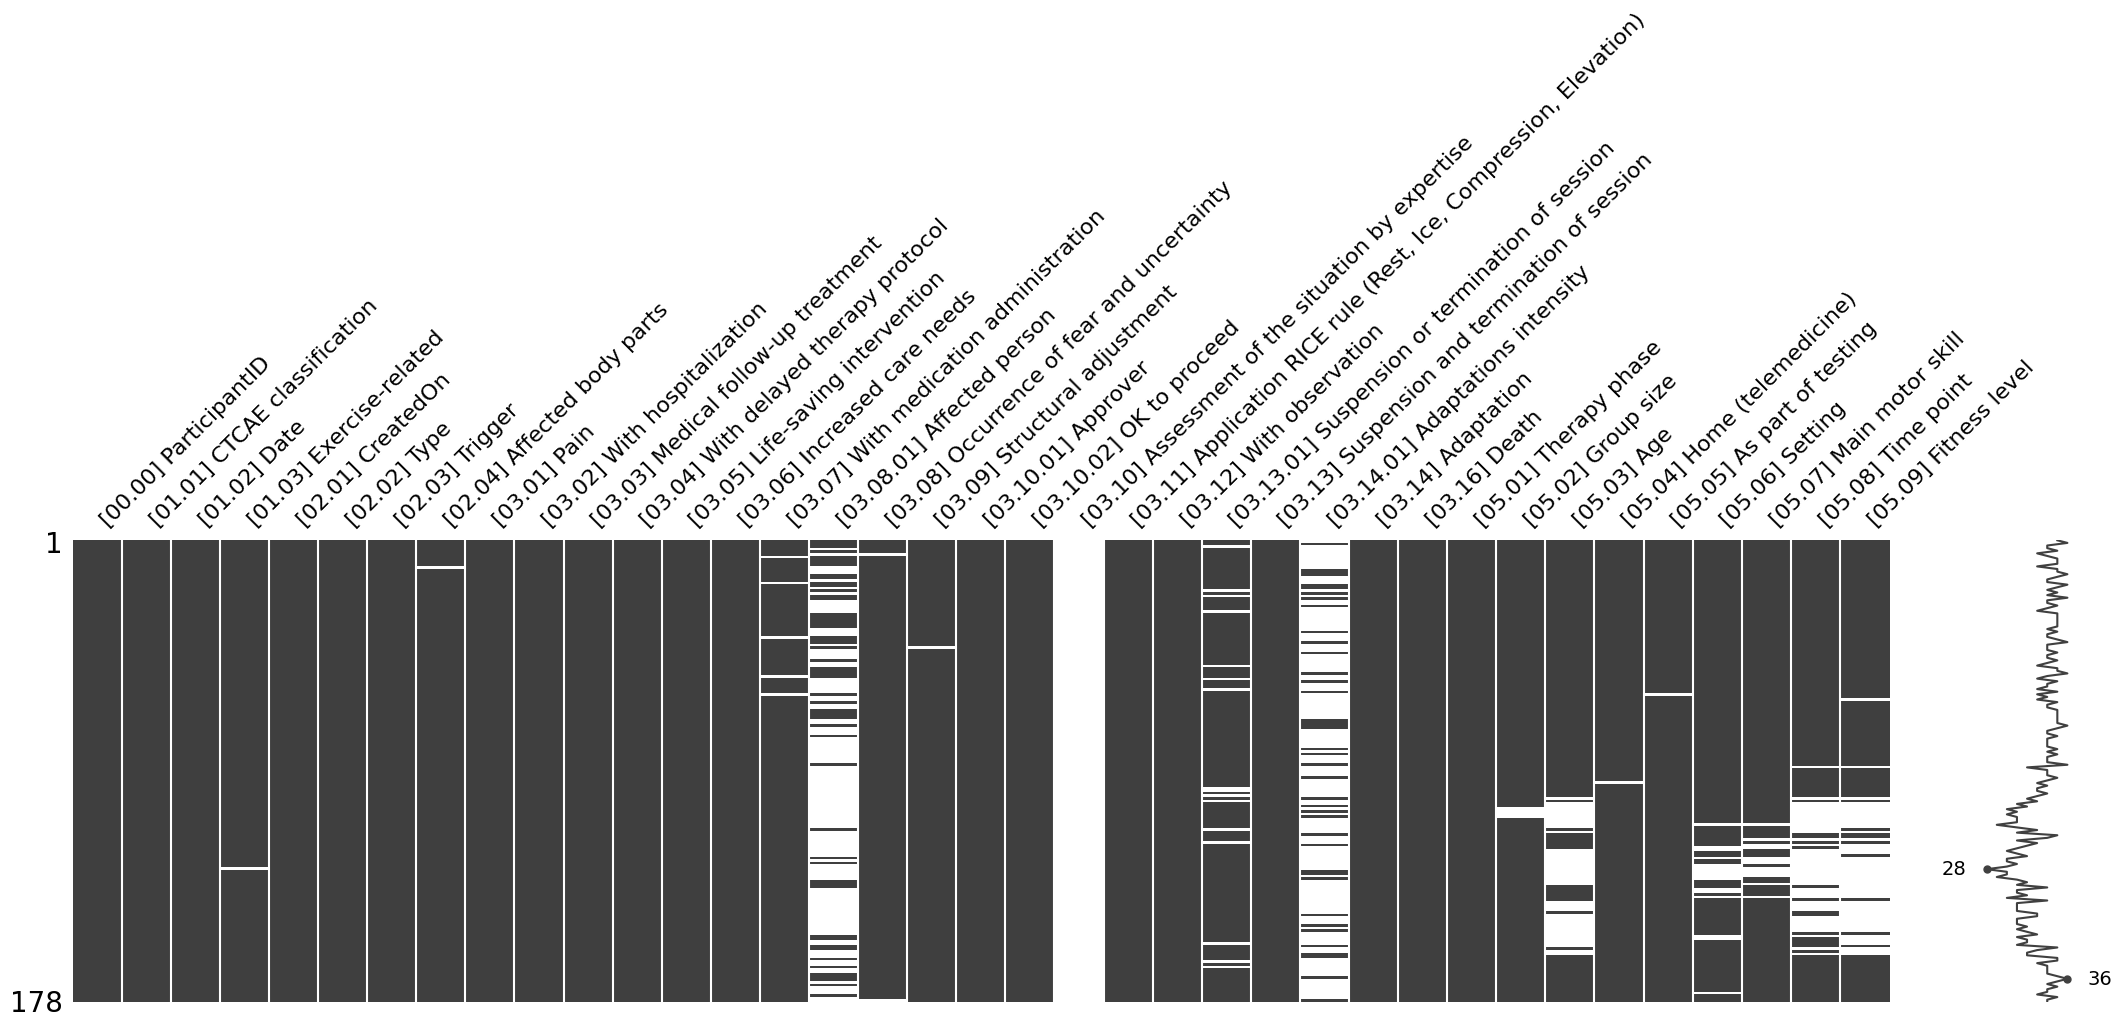

In [2]:
from pyparsing import C


df_csv_condensed = (
    pd.read_csv(
        dir_data_out / "df_csv_condensed.csv",
        sep=";",
        encoding="utf-8-sig",
        index_col=None,
    )
)

# * CTCAE should be a string with integer values and MUST have <NA> as NA
df_csv_condensed[CTCAE] = (df_csv_condensed[CTCAE]
        .astype("Int64")
        .astype(str)
        .replace("<NA>", pd.NA)
)

# * mark columns that should be str instead of float, fuzzy
# col_int = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=["[01.01]"])

# df_csv_condensed = df_csv_condensed.astype({col_int[0]: "Int64"}).astype(
#     {col_int[0]: str}
# )


tbl.describe_df(
    df_csv_condensed,#.iloc[:, [13]],
    "condensed",
    top_n_uniques=5,
    top_n_chars_in_index=5,
    use_plot=True,
    top_n_chars_in_columns=20,
    use_missing=True,
    fig_cols=6,
)

## <a id='toc1_2_'></a>[🕹️ interactive](#toc0_)

In [3]:
if False:
    import pygwalker as pyg 
    
    _df = df_csv_condensed.astype(str)#.sort_index(axis=1)

    _=pyg.walk(
        dataset=_df,
        appearance=os.getenv("THEME"),
        kernel_computation=True,
    )

## <a id='toc1_3_'></a>[descriptive stats](#toc0_)

In [4]:
stubs = (
        "[01.01]",
        "[01.02]",
        "[01.03]",
        "[02.02]",
        "[02.03]",
        "[02.04]",
        "[03.02]",
        "[03.03]",
        "[03.04]",
        "[03.06]",
        "[03.07]",
        "[03.08]",
        "[03.08.01]",
        "[03.08.02]",
        "[03.09]",
        "[03.10]",
        "[03.10.01]",
        "[03.11]",
        "[03.11.02]",
        "[03.12]",
        "[03.13]",
        "[03.13.01]",
        "[03.13.02]",
        "[03.14]",
        "[03.14.01]",
        "[03.14.02]",
        "[03.15]",
        "[03.17]",
        "[05.01]",
        "[05.02]",
        "[05.03]",
        "[05.04]",
        "[05.05]",
        "[05.06]",
        "[05.07]",
        "[05.08]",
        "[05.09]",
        )
cols = hlp.find_cols(all_cols=df_csv_condensed.columns, stubs=stubs)

# * get all columns
# cols = df_csv_condensed.columns
cols

['[01.01] CTCAE classification',
 '[01.02] Date',
 '[01.03] Exercise-related',
 '[02.02] Type',
 '[02.03] Trigger',
 '[02.04] Affected body parts',
 '[03.02] With hospitalization',
 '[03.03] Medical follow-up treatment',
 '[03.04] With delayed therapy protocol',
 '[03.06] Increased care needs',
 '[03.07] With medication administration',
 '[03.08] Occurrence of fear and uncertainty',
 '[03.08.01] Affected person',
 '[03.09] Structural adjustment',
 '[03.10] Assessment of the situation by expertise',
 '[03.10.01] Approver',
 '[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)',
 '[03.12] With observation',
 '[03.13] Suspension and termination of session',
 '[03.13.01] Suspension or termination of session',
 '[03.14] Adaptation',
 '[03.14.01] Adaptations intensity',
 '[05.01] Therapy phase',
 '[05.02] Group size',
 '[05.03] Age',
 '[05.04] Home (telemedicine)',
 '[05.05] As part of testing',
 '[05.06] Setting',
 '[05.07] Main motor skill',
 '[05.08] Time point',
 '[05.09] F

In [5]:
# # ! remove rows with missing CTCAE
df_csv_condensed = df_csv_condensed[df_csv_condensed[CTCAE].notna()]

In [6]:
# n = len(df_csv_condensed)

# for col in cols:
#     if df_csv_condensed[col].dtype.kind in ("O"):
#         df = (df_csv_condensed[col]
#             .str.split("|")
#             .explode()
#             .value_counts()
#             .to_frame()
#             .rename(columns={"count": "cnt"})
#             .assign(pct=lambda x: x["cnt"] / n)
#             .round({"pct": 2})
#         )
#         con.from_df(df.reset_index()).show()


### <a id='toc1_3_1_'></a>[full data](#toc0_)

In [7]:
# print_survey(df_csv_condensed)
h.print_survey(df_in=df_csv_condensed, cols=cols, CTCAE=CTCAE)

[01.01] CTCAE classification,1,2,3,Total
[01.02] Date,,,,
New onset,110 (61.8%),34 (19.1%),2 (1.1%),146 (82.0%)
"Pre-existing, aggravated",23 (12.9%),8 (4.5%),1 (0.6%),32 (18.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[01.03] Exercise-related,,,,
No,19 (10.7%),7 (4.0%),1 (0.6%),27 (15.3%)
Yes,113 (63.8%),35 (19.8%),2 (1.1%),150 (84.7%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[02.02] Type,,,,
Bone injuries,0,0,2 (0.9%),2 (0.9%)
Circulatory problems,28 (12.3%),2 (0.9%),0,30 (13.2%)
Coughing fit,4 (1.8%),0,0,4 (1.8%)
Enuresis,2 (0.9%),0,0,2 (0.9%)
Itching,3 (1.3%),1 (0.4%),0,4 (1.8%)
Muscle cramps,1 (0.4%),0,0,1 (0.4%)
Muscle soreness,4 (1.8%),2 (0.9%),0,6 (2.6%)
Nausea/vomiting,31 (13.6%),4 (1.8%),0,35 (15.4%)
Nosebleed,1 (0.4%),1 (0.4%),0,2 (0.9%)


[01.01] CTCAE classification,1,2,3,Total
[02.03] Trigger,,,,
Collision,7 (2.5%),2 (0.7%),0,9 (3.2%)
Coordination problems,14 (4.9%),8 (2.8%),1 (0.4%),23 (8.1%)
Environmental conditions,5 (1.8%),1 (0.4%),0,6 (2.1%)
Fall-related incident,21 (7.4%),19 (6.7%),1 (0.4%),41 (14.4%)
Medical treatment,68 (23.9%),11 (3.9%),0,79 (27.7%)
Other,1 (0.4%),0,0,1 (0.4%)
Physical (Over)exertion,94 (33.0%),17 (6.0%),2 (0.7%),113 (39.6%)
Psychological stress,11 (3.9%),2 (0.7%),0,13 (4.6%)
Total,221 (77.5%),60 (21.1%),4 (1.4%),285 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[02.04] Affected body parts,,,,
Abdomen,7 (3.8%),4 (2.2%),0,11 (5.9%)
Back,7 (3.8%),3 (1.6%),0,10 (5.4%)
Bowel,3 (1.6%),0,0,3 (1.6%)
Buttocks,4 (2.2%),2 (1.1%),0,6 (3.2%)
Chest,4 (2.2%),1 (0.5%),0,5 (2.7%)
Coccyx,2 (1.1%),0,0,2 (1.1%)
Full body,6 (3.2%),2 (1.1%),1 (0.5%),9 (4.8%)
Genital area,0,1 (0.5%),0,1 (0.5%)
Head,10 (5.4%),10 (5.4%),0,20 (10.8%)


[01.01] CTCAE classification,1,2,3,Total
[03.02] With hospitalization,,,,
(Unknown),0,0,1 (0.6%),1 (0.6%)
No,132 (74.2%),42 (23.6%),1 (0.6%),175 (98.3%)
Yes,1 (0.6%),0,1 (0.6%),2 (1.1%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.03] Medical follow-up treatment,,,,
(Unknown),3 (1.7%),0,0,3 (1.7%)
No,121 (68.0%),8 (4.5%),0,129 (72.5%)
Yes,9 (5.1%),34 (19.1%),3 (1.7%),46 (25.8%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.04] With delayed therapy protocol,,,,
No,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.06] Increased care needs,,,,
No,132 (74.2%),42 (23.6%),0,174 (97.8%)
Yes,1 (0.6%),0,3 (1.7%),4 (2.2%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.07] With medication administration,,,,
(Unknown),21 (12.1%),12 (6.9%),0,33 (19.1%)
No,111 (64.2%),24 (13.9%),0,135 (78.0%)
Yes,0,2 (1.2%),3 (1.7%),5 (2.9%)
Total,132 (76.3%),38 (22.0%),3 (1.7%),173 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.08] Occurrence of fear and uncertainty,,,,
No,98 (55.7%),21 (11.9%),0,119 (67.6%)
Yes,34 (19.3%),21 (11.9%),2 (1.1%),57 (32.4%)
Total,132 (75.0%),42 (23.9%),2 (1.1%),176 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.08.01] Affected person,,,,
For affected individuals,33 (37.5%),19 (21.6%),2 (2.3%),54 (61.4%)
For parents,2 (2.3%),3 (3.4%),1 (1.1%),6 (6.8%)
For the excercise experts,3 (3.4%),4 (4.5%),1 (1.1%),8 (9.1%)
In the treatment team,9 (10.2%),1 (1.1%),2 (2.3%),12 (13.6%)
Offers rejected,5 (5.7%),3 (3.4%),0,8 (9.1%)
Total,52 (59.1%),30 (34.1%),6 (6.8%),88 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.09] Structural adjustment,,,,
No,128 (72.3%),37 (20.9%),2 (1.1%),167 (94.4%)
Yes,5 (2.8%),4 (2.3%),1 (0.6%),10 (5.6%)
Total,133 (75.1%),41 (23.2%),3 (1.7%),177 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.10.01] Approver,,,,
-,104 (58.4%),19 (10.7%),0,123 (69.1%)
Medical team,10 (5.6%),14 (7.9%),3 (1.7%),27 (15.2%)
Nursing team,15 (8.4%),7 (3.9%),0,22 (12.4%)
Parents,2 (1.1%),0,0,2 (1.1%)
Physiotherapy,1 (0.6%),2 (1.1%),0,3 (1.7%)
Psychosocial team,1 (0.6%),0,0,1 (0.6%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
"[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)",,,,
No,131 (73.6%),28 (15.7%),1 (0.6%),160 (89.9%)
Yes,2 (1.1%),14 (7.9%),2 (1.1%),18 (10.1%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.12] With observation,,,,
(Unknown),1 (0.6%),0,0,1 (0.6%)
No,129 (72.5%),40 (22.5%),2 (1.1%),171 (96.1%)
Yes,3 (1.7%),2 (1.1%),1 (0.6%),6 (3.4%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.13] Suspension and termination of session,,,,
No,11 (6.2%),5 (2.8%),0,16 (9.0%)
Yes,122 (68.5%),37 (20.8%),3 (1.7%),162 (91.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.13.01] Suspension or termination of session,,,,
Suspension of session,53 (32.7%),15 (9.3%),1 (0.6%),69 (42.6%)
Termination of session,69 (42.6%),22 (13.6%),2 (1.2%),93 (57.4%)
Total,122 (75.3%),37 (22.8%),3 (1.9%),162 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.14] Adaptation,,,,
-,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,Total
[03.14.01] Adaptations intensity,,,
Communication strategy,3 (5.4%),0,3 (5.4%)
Equipment,2 (3.6%),1 (1.8%),3 (5.4%)
Exercise selection,27 (48.2%),3 (5.4%),30 (53.6%)
Intensity,17 (30.4%),1 (1.8%),18 (32.1%)
Setting,2 (3.6%),0,2 (3.6%)
Total,51 (91.1%),5 (8.9%),56 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.01] Therapy phase,,,,
Acute therapy,120 (67.4%),26 (14.6%),1 (0.6%),147 (82.6%)
Long-term therapy,4 (2.2%),2 (1.1%),0,6 (3.4%)
Post-treatment care,9 (5.1%),14 (7.9%),2 (1.1%),25 (14.0%)
Total,133 (74.7%),42 (23.6%),3 (1.7%),178 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.02] Group size,,,,
Group 2-5,1 (0.6%),1 (0.6%),0,2 (1.1%)
Group 5 to 10,1 (0.6%),4 (2.3%),1 (0.6%),6 (3.4%)
Group over 10,0,6 (3.4%),0,6 (3.4%)
Individual,127 (73.0%),31 (17.8%),2 (1.1%),160 (92.0%)
Total,129 (74.1%),42 (24.1%),3 (1.7%),174 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.03] Age,,,,
02 to 05 years,14 (10.5%),9 (6.8%),0,23 (17.3%)
06 to 09 years,34 (25.6%),6 (4.5%),0,40 (30.1%)
10 to 14 years,29 (21.8%),9 (6.8%),0,38 (28.6%)
15 to 18 years,17 (12.8%),6 (4.5%),1 (0.8%),24 (18.0%)
18+ years,3 (2.3%),3 (2.3%),2 (1.5%),8 (6.0%)
Total,97 (72.9%),33 (24.8%),3 (2.3%),133 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.04] Home (telemedicine),,,,
No,126 (71.2%),40 (22.6%),3 (1.7%),169 (95.5%)
Yes,6 (3.4%),2 (1.1%),0,8 (4.5%)
Total,132 (74.6%),42 (23.7%),3 (1.7%),177 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.05] As part of testing,,,,
No,129 (72.9%),41 (23.2%),3 (1.7%),173 (97.7%)
Yes,4 (2.3%),0,0,4 (2.3%)
Total,133 (75.1%),41 (23.2%),3 (1.7%),177 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.06] Setting,,,,
At home (via telemedicine),5 (3.1%),2 (1.2%),0,7 (4.3%)
Exercise room,42 (25.9%),19 (11.7%),2 (1.2%),63 (38.9%)
Hospital corridor,34 (21.0%),7 (4.3%),0,41 (25.3%)
Outdoors,6 (3.7%),4 (2.5%),1 (0.6%),11 (6.8%)
Patient room,32 (19.8%),8 (4.9%),0,40 (24.7%)
Total,119 (73.5%),40 (24.7%),3 (1.9%),162 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.07] Main motor skill,,,,
Coordination,60 (26.1%),19 (8.3%),3 (1.3%),82 (35.7%)
Endurance,37 (16.1%),11 (4.8%),0,48 (20.9%)
Flexibility,21 (9.1%),3 (1.3%),0,24 (10.4%)
Multimodal,19 (8.3%),5 (2.2%),0,24 (10.4%)
Relaxation,2 (0.9%),0,0,2 (0.9%)
Speed,5 (2.2%),5 (2.2%),0,10 (4.3%)
Strength,27 (11.7%),12 (5.2%),1 (0.4%),40 (17.4%)
Total,171 (74.3%),55 (23.9%),4 (1.7%),230 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.08] Time point,,,,
First Half,50 (38.2%),6 (4.6%),2 (1.5%),58 (44.3%)
Second Half,46 (35.1%),26 (19.8%),1 (0.8%),73 (55.7%)
Total,96 (73.3%),32 (24.4%),3 (2.3%),131 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.09] Fitness level,,,,
(Unknown),3 (2.4%),0,0,3 (2.4%)
Average,26 (21.0%),10 (8.1%),0,36 (29.0%)
Good,10 (8.1%),2 (1.6%),0,12 (9.7%)
Moderate,53 (42.7%),17 (13.7%),3 (2.4%),73 (58.9%)
Total,92 (74.2%),29 (23.4%),3 (2.4%),124 (100.0%)


### <a id='toc1_3_2_'></a>[only `Exercise-related`](#toc0_)

In [9]:
h.print_survey(df_csv_condensed[df_csv_condensed["[01.03] Exercise-related"] == 'Yes'], cols=cols, CTCAE=CTCAE)

[01.01] CTCAE classification,1,2,3,Total
[01.02] Date,,,,
New onset,97 (64.7%),33 (22.0%),2 (1.3%),132 (88.0%)
"Pre-existing, aggravated",16 (10.7%),2 (1.3%),0,18 (12.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[01.03] Exercise-related,,,,
Yes,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[02.02] Type,,,,
Bone injuries,0,0,2 (1.0%),2 (1.0%)
Circulatory problems,26 (13.4%),1 (0.5%),0,27 (13.9%)
Coughing fit,3 (1.5%),0,0,3 (1.5%)
Enuresis,2 (1.0%),0,0,2 (1.0%)
Itching,3 (1.5%),1 (0.5%),0,4 (2.1%)
Muscle cramps,1 (0.5%),0,0,1 (0.5%)
Muscle soreness,4 (2.1%),2 (1.0%),0,6 (3.1%)
Nausea/vomiting,23 (11.9%),2 (1.0%),0,25 (12.9%)
Nosebleed,0,1 (0.5%),0,1 (0.5%)


[01.01] CTCAE classification,1,2,3,Total
[02.03] Trigger,,,,
Collision,7 (3.0%),1 (0.4%),0,8 (3.4%)
Coordination problems,14 (6.0%),7 (3.0%),1 (0.4%),22 (9.4%)
Environmental conditions,5 (2.1%),0,0,5 (2.1%)
Fall-related incident,21 (8.9%),18 (7.7%),1 (0.4%),40 (17.0%)
Medical treatment,50 (21.3%),7 (3.0%),0,57 (24.3%)
Physical (Over)exertion,80 (34.0%),13 (5.5%),1 (0.4%),94 (40.0%)
Psychological stress,8 (3.4%),1 (0.4%),0,9 (3.8%)
Total,185 (78.7%),47 (20.0%),3 (1.3%),235 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[02.04] Affected body parts,,,,
Abdomen,4 (2.6%),3 (1.9%),0,7 (4.5%)
Back,7 (4.5%),2 (1.3%),0,9 (5.8%)
Bowel,3 (1.9%),0,0,3 (1.9%)
Buttocks,4 (2.6%),2 (1.3%),0,6 (3.8%)
Chest,4 (2.6%),1 (0.6%),0,5 (3.2%)
Coccyx,1 (0.6%),0,0,1 (0.6%)
Full body,5 (3.2%),2 (1.3%),0,7 (4.5%)
Genital area,0,1 (0.6%),0,1 (0.6%)
Head,7 (4.5%),9 (5.8%),0,16 (10.3%)


[01.01] CTCAE classification,1,2,3,Total
[03.02] With hospitalization,,,,
(Unknown),0,0,1 (0.7%),1 (0.7%)
No,113 (75.3%),35 (23.3%),0,148 (98.7%)
Yes,0,0,1 (0.7%),1 (0.7%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.03] Medical follow-up treatment,,,,
(Unknown),1 (0.7%),0,0,1 (0.7%)
No,105 (70.0%),6 (4.0%),0,111 (74.0%)
Yes,7 (4.7%),29 (19.3%),2 (1.3%),38 (25.3%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.04] With delayed therapy protocol,,,,
No,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.06] Increased care needs,,,,
No,112 (74.7%),35 (23.3%),0,147 (98.0%)
Yes,1 (0.7%),0,2 (1.3%),3 (2.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.07] With medication administration,,,,
(Unknown),17 (11.6%),11 (7.5%),0,28 (19.0%)
No,95 (64.6%),21 (14.3%),0,116 (78.9%)
Yes,0,1 (0.7%),2 (1.4%),3 (2.0%)
Total,112 (76.2%),33 (22.4%),2 (1.4%),147 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.08] Occurrence of fear and uncertainty,,,,
No,84 (56.4%),21 (14.1%),0,105 (70.5%)
Yes,28 (18.8%),14 (9.4%),2 (1.3%),44 (29.5%)
Total,112 (75.2%),35 (23.5%),2 (1.3%),149 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.08.01] Affected person,,,,
For affected individuals,28 (39.4%),13 (18.3%),2 (2.8%),43 (60.6%)
For parents,2 (2.8%),2 (2.8%),1 (1.4%),5 (7.0%)
For the excercise experts,2 (2.8%),3 (4.2%),1 (1.4%),6 (8.5%)
In the treatment team,8 (11.3%),1 (1.4%),2 (2.8%),11 (15.5%)
Offers rejected,4 (5.6%),2 (2.8%),0,6 (8.5%)
Total,44 (62.0%),21 (29.6%),6 (8.5%),71 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.09] Structural adjustment,,,,
No,109 (73.2%),30 (20.1%),1 (0.7%),140 (94.0%)
Yes,4 (2.7%),4 (2.7%),1 (0.7%),9 (6.0%)
Total,113 (75.8%),34 (22.8%),2 (1.3%),149 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.10.01] Approver,,,,
-,90 (60.0%),16 (10.7%),0,106 (70.7%)
Medical team,7 (4.7%),12 (8.0%),2 (1.3%),21 (14.0%)
Nursing team,14 (9.3%),5 (3.3%),0,19 (12.7%)
Parents,1 (0.7%),0,0,1 (0.7%)
Physiotherapy,1 (0.7%),2 (1.3%),0,3 (2.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
"[03.11] Application RICE rule (Rest, Ice, Compression, Elevation)",,,,
No,111 (74.0%),21 (14.0%),0,132 (88.0%)
Yes,2 (1.3%),14 (9.3%),2 (1.3%),18 (12.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.12] With observation,,,,
(Unknown),1 (0.7%),0,0,1 (0.7%)
No,110 (73.3%),33 (22.0%),1 (0.7%),144 (96.0%)
Yes,2 (1.3%),2 (1.3%),1 (0.7%),5 (3.3%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.13] Suspension and termination of session,,,,
No,10 (6.7%),4 (2.7%),0,14 (9.3%)
Yes,103 (68.7%),31 (20.7%),2 (1.3%),136 (90.7%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.13.01] Suspension or termination of session,,,,
Suspension of session,49 (36.0%),14 (10.3%),0,63 (46.3%)
Termination of session,54 (39.7%),17 (12.5%),2 (1.5%),73 (53.7%)
Total,103 (75.7%),31 (22.8%),2 (1.5%),136 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[03.14] Adaptation,,,,
-,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,Total
[03.14.01] Adaptations intensity,,,
Communication strategy,3 (5.5%),0,3 (5.5%)
Equipment,2 (3.6%),1 (1.8%),3 (5.5%)
Exercise selection,26 (47.3%),3 (5.5%),29 (52.7%)
Intensity,17 (30.9%),1 (1.8%),18 (32.7%)
Setting,2 (3.6%),0,2 (3.6%)
Total,50 (90.9%),5 (9.1%),55 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.01] Therapy phase,,,,
Acute therapy,101 (67.3%),19 (12.7%),0,120 (80.0%)
Long-term therapy,4 (2.7%),2 (1.3%),0,6 (4.0%)
Post-treatment care,8 (5.3%),14 (9.3%),2 (1.3%),24 (16.0%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.02] Group size,,,,
Group 2-5,1 (0.7%),1 (0.7%),0,2 (1.4%)
Group 5 to 10,1 (0.7%),4 (2.7%),1 (0.7%),6 (4.1%)
Group over 10,0,6 (4.1%),0,6 (4.1%)
Individual,107 (73.3%),24 (16.4%),1 (0.7%),132 (90.4%)
Total,109 (74.7%),35 (24.0%),2 (1.4%),146 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.03] Age,,,,
02 to 05 years,11 (10.2%),5 (4.6%),0,16 (14.8%)
06 to 09 years,30 (27.8%),6 (5.6%),0,36 (33.3%)
10 to 14 years,24 (22.2%),6 (5.6%),0,30 (27.8%)
15 to 18 years,12 (11.1%),6 (5.6%),1 (0.9%),19 (17.6%)
18+ years,3 (2.8%),3 (2.8%),1 (0.9%),7 (6.5%)
Total,80 (74.1%),26 (24.1%),2 (1.9%),108 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.04] Home (telemedicine),,,,
No,106 (71.1%),33 (22.1%),2 (1.3%),141 (94.6%)
Yes,6 (4.0%),2 (1.3%),0,8 (5.4%)
Total,112 (75.2%),35 (23.5%),2 (1.3%),149 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.05] As part of testing,,,,
No,109 (72.7%),35 (23.3%),2 (1.3%),146 (97.3%)
Yes,4 (2.7%),0,0,4 (2.7%)
Total,113 (75.3%),35 (23.3%),2 (1.3%),150 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.06] Setting,,,,
At home (via telemedicine),5 (3.7%),2 (1.5%),0,7 (5.1%)
Exercise room,39 (28.7%),18 (13.2%),1 (0.7%),58 (42.6%)
Hospital corridor,28 (20.6%),3 (2.2%),0,31 (22.8%)
Outdoors,6 (4.4%),4 (2.9%),1 (0.7%),11 (8.1%)
Patient room,23 (16.9%),6 (4.4%),0,29 (21.3%)
Total,101 (74.3%),33 (24.3%),2 (1.5%),136 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.07] Main motor skill,,,,
Coordination,52 (26.7%),16 (8.2%),2 (1.0%),70 (35.9%)
Endurance,30 (15.4%),9 (4.6%),0,39 (20.0%)
Flexibility,13 (6.7%),2 (1.0%),0,15 (7.7%)
Multimodal,19 (9.7%),4 (2.1%),0,23 (11.8%)
Relaxation,2 (1.0%),0,0,2 (1.0%)
Speed,5 (2.6%),5 (2.6%),0,10 (5.1%)
Strength,25 (12.8%),10 (5.1%),1 (0.5%),36 (18.5%)
Total,146 (74.9%),46 (23.6%),3 (1.5%),195 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.08] Time point,,,,
First Half,38 (36.2%),4 (3.8%),2 (1.9%),44 (41.9%)
Second Half,40 (38.1%),21 (20.0%),0,61 (58.1%)
Total,78 (74.3%),25 (23.8%),2 (1.9%),105 (100.0%)


[01.01] CTCAE classification,1,2,3,Total
[05.09] Fitness level,,,,
(Unknown),2 (2.0%),0,0,2 (2.0%)
Average,23 (23.2%),8 (8.1%),0,31 (31.3%)
Good,9 (9.1%),2 (2.0%),0,11 (11.1%)
Moderate,41 (41.4%),12 (12.1%),2 (2.0%),55 (55.6%)
Total,75 (75.8%),22 (22.2%),2 (2.0%),99 (100.0%)


## <a id='toc1_4_'></a>[slides](#toc0_)

In [10]:
def create_multi_chart(df_):
    df = df_.copy()
    df.iloc[:,0] = df.iloc[:,0].str.split("|")
    df.iloc[:,1] = df.iloc[:,1].str.split("|")
    df = df.explode(df.columns[0]).explode(df.columns[1])
    
    _=(df
        .plot_stacked_bars(
            swap = True,
            top_n_index = 5,
            # sort_values_index=True,
            top_n_color = 5,
            sort_values_color=True,
            relative = True,
            height=800,
            # * this adds a remark to chart title. only use on small subsets
            dropna=True,
            # show_other=True,
        )
    )
    
    display(tbl.pivot_df(df, pct_axis="x", data_bar_axis="x", heatmap_axis=""))
    
    # _ = pls.plot_stacked_bars(
    #     df=df_,
    #     swap=True,
    #     height=800,
    #     top_n_index=5,
    #     sort_values_index=True,
    #     top_n_color=5,
    #     sort_values_color=True,
    #     relative=True,
    #     dropna=True,
    #     # show_other=True,
    # )
    
    return

In [11]:
# # * apply filter if needed
df_slides = (df_csv_condensed
    # [
    #     df_csv_condensed['[01.01] CTCAE'].notna()
    # ]
    .copy()
)

### <a id='toc1_4_1_'></a>[slide 1](#toc0_)

In [12]:
slide1=df_slides.find_cols(["[05.07]","[02.02]"])
create_multi_chart(df_slides[slide1])

[02.02] Type,Bone injuries,Circulatory problems,Coughing fit,Enuresis,Itching,Muscle cramps,Muscle soreness,Nausea/vomiting,Nosebleed,Pain,Physical (Over)exertion,Psychological stress reaction,Soft-tissue injury,Spontaneous painful bowel movement,Superficial injuries,Total
[05.07] Main motor skill,,,,,,,,,,,,,,,,
,0,3 (8.1%),0,1 (50.0%),0,0,0,3 (6.5%),0,6 (4.5%),0,0,0,0,1 (4.2%),14 (4.5%)
Coordination,2 (66.7%),14 (37.8%),1 (20.0%),0,2 (33.3%),0,0,8 (17.4%),0,53 (39.6%),0,2 (22.2%),13 (44.8%),1 (25.0%),9 (37.5%),105 (33.5%)
Endurance,0,8 (21.6%),2 (40.0%),0,1 (16.7%),0,2 (28.6%),9 (19.6%),1 (50.0%),26 (19.4%),0,1 (11.1%),4 (13.8%),0,7 (29.2%),61 (19.5%)
Flexibility,0,2 (5.4%),1 (20.0%),1 (50.0%),2 (33.3%),0,0,8 (17.4%),0,9 (6.7%),2 (50.0%),4 (44.4%),1 (3.4%),1 (25.0%),0,31 (9.9%)
Multimodal,0,5 (13.5%),1 (20.0%),0,0,0,1 (14.3%),8 (17.4%),0,10 (7.5%),1 (25.0%),0,2 (6.9%),1 (25.0%),0,29 (9.3%)
Relaxation,0,0,0,0,0,0,0,1 (2.2%),0,1 (0.7%),0,0,0,1 (25.0%),0,3 (1.0%)
Speed,0,0,0,0,0,0,0,0,0,10 (7.5%),0,0,4 (13.8%),0,4 (16.7%),18 (5.8%)
Strength,1 (33.3%),5 (13.5%),0,0,1 (16.7%),1 (100.0%),4 (57.1%),9 (19.6%),1 (50.0%),19 (14.2%),1 (25.0%),2 (22.2%),5 (17.2%),0,3 (12.5%),52 (16.6%)
Total,3 (100.0%),37 (100.0%),5 (100.0%),2 (100.0%),6 (100.0%),1 (100.0%),7 (100.0%),46 (100.0%),2 (100.0%),134 (100.0%),4 (100.0%),9 (100.0%),29 (100.0%),4 (100.0%),24 (100.0%),313 (100.0%)


### <a id='toc1_4_2_'></a>[slide 2](#toc0_)

In [13]:
slide2=df_slides.find_cols([
    "[02.03]",
    "[05.06]",
    ])
create_multi_chart(df_slides[slide2])

[05.06] Setting,nan,At home (via telemedicine),Exercise room,Hospital corridor,Outdoors,Patient room,Total
[02.03] Trigger,,,,,,,
Collision,0,0,3 (3.3%),3 (4.6%),0,3 (4.2%),9 (3.2%)
Coordination problems,2 (7.1%),0,4 (4.3%),4 (6.2%),5 (26.3%),8 (11.3%),23 (8.1%)
Environmental conditions,1 (3.6%),0,0,4 (6.2%),1 (5.3%),0,6 (2.1%)
Fall-related incident,2 (7.1%),0,17 (18.5%),10 (15.4%),9 (47.4%),3 (4.2%),41 (14.4%)
Medical treatment,10 (35.7%),2 (20.0%),24 (26.1%),19 (29.2%),0,24 (33.8%),79 (27.7%)
Other,0,0,1 (1.1%),0,0,0,1 (0.4%)
Physical (Over)exertion,13 (46.4%),7 (70.0%),39 (42.4%),21 (32.3%),4 (21.1%),29 (40.8%),113 (39.6%)
Psychological stress,0,1 (10.0%),4 (4.3%),4 (6.2%),0,4 (5.6%),13 (4.6%)
Total,28 (100.0%),10 (100.0%),92 (100.0%),65 (100.0%),19 (100.0%),71 (100.0%),285 (100.0%)


### <a id='toc1_4_3_'></a>[slide 3](#toc0_)

In [14]:
slide3=df_slides.find_cols(["[05.09]","[02.02]"])
create_multi_chart(df_slides[slide3])
#_df

[02.02] Type,Bone injuries,Circulatory problems,Coughing fit,Enuresis,Itching,Muscle cramps,Muscle soreness,Nausea/vomiting,Nosebleed,Pain,Physical (Over)exertion,Psychological stress reaction,Soft-tissue injury,Spontaneous painful bowel movement,Superficial injuries,Total
[05.09] Fitness level,,,,,,,,,,,,,,,,
(Unknown),0,0,0,0,0,0,0,0,0,3 (3.2%),0,0,0,1 (50.0%),0,4 (1.8%)
,0,10 (33.3%),0,1 (50.0%),1 (25.0%),0,1 (16.7%),12 (34.3%),0,30 (31.9%),0,0,6 (30.0%),0,4 (26.7%),65 (28.5%)
Average,0,5 (16.7%),2 (50.0%),1 (50.0%),1 (25.0%),0,1 (16.7%),9 (25.7%),0,16 (17.0%),2 (50.0%),3 (42.9%),6 (30.0%),0,3 (20.0%),49 (21.5%)
Good,0,1 (3.3%),0,0,0,0,0,2 (5.7%),0,7 (7.4%),0,1 (14.3%),2 (10.0%),0,1 (6.7%),14 (6.1%)
Moderate,2 (100.0%),14 (46.7%),2 (50.0%),0,2 (50.0%),1 (100.0%),4 (66.7%),12 (34.3%),2 (100.0%),38 (40.4%),2 (50.0%),3 (42.9%),6 (30.0%),1 (50.0%),7 (46.7%),96 (42.1%)
Total,2 (100.0%),30 (100.0%),4 (100.0%),2 (100.0%),4 (100.0%),1 (100.0%),6 (100.0%),35 (100.0%),2 (100.0%),94 (100.0%),4 (100.0%),7 (100.0%),20 (100.0%),2 (100.0%),15 (100.0%),228 (100.0%)


### <a id='toc1_4_4_'></a>[slide 4](#toc0_)

In [15]:
slide4=df_slides.find_cols(["[02.03]","[02.04]"])
create_multi_chart(df_slides[slide4])
#_df

[02.04] Affected body parts,nan,Abdomen,Back,Bowel,Buttocks,Chest,Coccyx,Full body,Genital area,Head,Internal organ,Lower extremities,Upper extremities,Total
[02.03] Trigger,,,,,,,,,,,,,,
Collision,0,0,1 (8.3%),0,0,0,1 (25.0%),0,1 (100.0%),2 (6.5%),0,2 (3.3%),2 (14.3%),9 (3.0%)
Coordination problems,0,0,1 (8.3%),0,5 (55.6%),1 (10.0%),0,0,0,5 (16.1%),0,12 (20.0%),3 (21.4%),27 (9.0%)
Environmental conditions,0,0,0,0,0,0,0,0,0,1 (3.2%),3 (2.5%),2 (3.3%),0,6 (2.0%)
Fall-related incident,0,0,2 (16.7%),0,4 (44.4%),3 (30.0%),0,0,0,10 (32.3%),1 (0.8%),18 (30.0%),7 (50.0%),45 (15.0%)
Medical treatment,0,9 (40.9%),2 (16.7%),3 (50.0%),0,3 (30.0%),1 (25.0%),2 (18.2%),0,7 (22.6%),51 (43.2%),3 (5.0%),1 (7.1%),82 (27.3%)
Other,0,0,0,0,0,0,0,0,0,1 (3.2%),0,0,0,1 (0.3%)
Physical (Over)exertion,1 (50.0%),11 (50.0%),6 (50.0%),3 (50.0%),0,2 (20.0%),2 (50.0%),8 (72.7%),0,5 (16.1%),57 (48.3%),21 (35.0%),1 (7.1%),117 (39.0%)
Psychological stress,1 (50.0%),2 (9.1%),0,0,0,1 (10.0%),0,1 (9.1%),0,0,6 (5.1%),2 (3.3%),0,13 (4.3%)
Total,2 (100.0%),22 (100.0%),12 (100.0%),6 (100.0%),9 (100.0%),10 (100.0%),4 (100.0%),11 (100.0%),1 (100.0%),31 (100.0%),118 (100.0%),60 (100.0%),14 (100.0%),300 (100.0%)


### <a id='toc1_4_5_'></a>[slide 5](#toc0_)

In [16]:
slide4=df_slides.find_cols(["[05.09]","[05.07]"])
create_multi_chart(df_slides[slide4])
#_df

[05.07] Main motor skill,nan,Coordination,Endurance,Flexibility,Multimodal,Relaxation,Speed,Strength,Total
[05.09] Fitness level,,,,,,,,,
(Unknown),0,3 (3.7%),0,1 (4.2%),0,1 (50.0%),1 (10.0%),0,6 (2.5%)
,13 (100.0%),22 (26.8%),15 (31.2%),7 (29.2%),9 (37.5%),0,2 (20.0%),6 (15.0%),74 (30.5%)
Average,0,15 (18.3%),7 (14.6%),4 (16.7%),7 (29.2%),1 (50.0%),3 (30.0%),8 (20.0%),45 (18.5%)
Good,0,7 (8.5%),6 (12.5%),1 (4.2%),0,0,0,3 (7.5%),17 (7.0%)
Moderate,0,35 (42.7%),20 (41.7%),11 (45.8%),8 (33.3%),0,4 (40.0%),23 (57.5%),101 (41.6%)
Total,13 (100.0%),82 (100.0%),48 (100.0%),24 (100.0%),24 (100.0%),2 (100.0%),10 (100.0%),40 (100.0%),243 (100.0%)


### <a id='toc1_4_6_'></a>[slide 6](#toc0_)

In [17]:
# todo create new variable
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[02.03] Trigger,,,,,,,
Collision,0,3 (7.7%),4 (6.2%),1 (1.7%),1 (2.6%),0,9 (3.2%)
Coordination problems,4 (5.9%),3 (7.7%),10 (15.6%),2 (3.3%),1 (2.6%),3 (20.0%),23 (8.1%)
Environmental conditions,3 (4.4%),2 (5.1%),0,1 (1.7%),0,0,6 (2.1%)
Fall-related incident,14 (20.6%),8 (20.5%),11 (17.2%),3 (5.0%),2 (5.1%),3 (20.0%),41 (14.4%)
Medical treatment,18 (26.5%),11 (28.2%),14 (21.9%),18 (30.0%),16 (41.0%),2 (13.3%),79 (27.7%)
Other,0,0,0,0,1 (2.6%),0,1 (0.4%)
Physical (Over)exertion,28 (41.2%),10 (25.6%),21 (32.8%),29 (48.3%),18 (46.2%),7 (46.7%),113 (39.6%)
Psychological stress,1 (1.5%),2 (5.1%),4 (6.2%),6 (10.0%),0,0,13 (4.6%)
Total,68 (100.0%),39 (100.0%),64 (100.0%),60 (100.0%),39 (100.0%),15 (100.0%),285 (100.0%)


### <a id='toc1_4_7_'></a>[slide 7](#toc0_)

In [18]:
slide4=df_slides.find_cols([
    "[02.02]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[02.02] Type,,,,,,,
Bone injuries,0,0,0,0,1 (3.4%),1 (11.1%),2 (0.9%)
Circulatory problems,10 (18.5%),1 (3.3%),3 (5.9%),10 (18.2%),3 (10.3%),3 (33.3%),30 (13.2%)
Coughing fit,0,0,1 (2.0%),3 (5.5%),0,0,4 (1.8%)
Enuresis,0,1 (3.3%),0,1 (1.8%),0,0,2 (0.9%)
Itching,1 (1.9%),1 (3.3%),0,0,2 (6.9%),0,4 (1.8%)
Muscle cramps,0,0,0,1 (1.8%),0,0,1 (0.4%)
Muscle soreness,1 (1.9%),0,1 (2.0%),3 (5.5%),1 (3.4%),0,6 (2.6%)
Nausea/vomiting,9 (16.7%),2 (6.7%),7 (13.7%),9 (16.4%),8 (27.6%),0,35 (15.4%)
Nosebleed,1 (1.9%),0,0,0,1 (3.4%),0,2 (0.9%)


### <a id='toc1_4_8_'></a>[slide 8](#toc0_)

In [19]:
slide4=df_slides.find_cols([
    "[02.03]",
    "[05.03]"
    ])
create_multi_chart(df_slides[slide4])
#_df

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[02.03] Trigger,,,,,,,
Collision,0,3 (7.7%),4 (6.2%),1 (1.7%),1 (2.6%),0,9 (3.2%)
Coordination problems,4 (5.9%),3 (7.7%),10 (15.6%),2 (3.3%),1 (2.6%),3 (20.0%),23 (8.1%)
Environmental conditions,3 (4.4%),2 (5.1%),0,1 (1.7%),0,0,6 (2.1%)
Fall-related incident,14 (20.6%),8 (20.5%),11 (17.2%),3 (5.0%),2 (5.1%),3 (20.0%),41 (14.4%)
Medical treatment,18 (26.5%),11 (28.2%),14 (21.9%),18 (30.0%),16 (41.0%),2 (13.3%),79 (27.7%)
Other,0,0,0,0,1 (2.6%),0,1 (0.4%)
Physical (Over)exertion,28 (41.2%),10 (25.6%),21 (32.8%),29 (48.3%),18 (46.2%),7 (46.7%),113 (39.6%)
Psychological stress,1 (1.5%),2 (5.1%),4 (6.2%),6 (10.0%),0,0,13 (4.6%)
Total,68 (100.0%),39 (100.0%),64 (100.0%),60 (100.0%),39 (100.0%),15 (100.0%),285 (100.0%)


### <a id='toc1_4_9_'></a>[slide 9](#toc0_)

In [20]:
slide4=df_slides.find_cols([
    "[02.02]",
    "[05.01]",
    ])
create_multi_chart(df_slides[slide4])
#_df

[05.01] Therapy phase,Acute therapy,Long-term therapy,Post-treatment care,Total
[02.02] Type,,,,
Bone injuries,0,0,2 (5.3%),2 (0.9%)
Circulatory problems,28 (15.3%),0,2 (5.3%),30 (13.2%)
Coughing fit,4 (2.2%),0,0,4 (1.8%)
Enuresis,2 (1.1%),0,0,2 (0.9%)
Itching,3 (1.6%),0,1 (2.6%),4 (1.8%)
Muscle cramps,1 (0.5%),0,0,1 (0.4%)
Muscle soreness,5 (2.7%),1 (14.3%),0,6 (2.6%)
Nausea/vomiting,33 (18.0%),2 (28.6%),0,35 (15.4%)
Nosebleed,2 (1.1%),0,0,2 (0.9%)


### <a id='toc1_4_10_'></a>[slide 10](#toc0_)

In [21]:
slide4=df_slides.find_cols([
    "[05.07]",
    "[01.03]",
    ])
create_multi_chart(df_slides[slide4])
#_df

[01.03] Exercise-related,nan,No,Yes,Total
[05.07] Main motor skill,,,,
,1 (100.0%),0,12 (5.8%),13 (5.3%)
Coordination,0,12 (34.3%),70 (33.8%),82 (33.7%)
Endurance,0,9 (25.7%),39 (18.8%),48 (19.8%)
Flexibility,0,9 (25.7%),15 (7.2%),24 (9.9%)
Multimodal,0,1 (2.9%),23 (11.1%),24 (9.9%)
Relaxation,0,0,2 (1.0%),2 (0.8%)
Speed,0,0,10 (4.8%),10 (4.1%)
Strength,0,4 (11.4%),36 (17.4%),40 (16.5%)
Total,1 (100.0%),35 (100.0%),207 (100.0%),243 (100.0%)


### <a id='toc1_4_11_'></a>[bonus - ci](#toc0_)

In [22]:
_cols = df_csv_condensed.find_cols(["[05.06]", "[01.01]"])
_cols
_df = df_csv_condensed[_cols].dropna()
_df = _df.astype({CTCAE: int})
_=pls.plot_bars(
    _df,
    use_ci=True,
    precision=2,
)


## <a id='toc1_5_'></a>[2025-03-18](#toc0_)

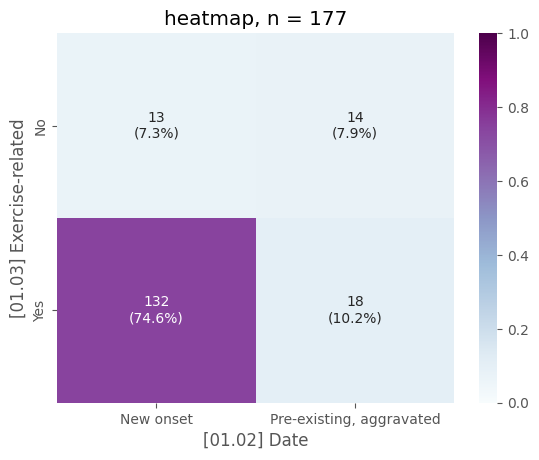

In [23]:
slide11=df_slides.find_cols([
    "[01.03]",
    "[01.02]",
    ])
# create_multi_chart(df_slides[slide11].dropna())
_=pls.plot_quadrants(df_slides[slide11].dropna())
# df_slides[slide11[1]].value_counts()


In [24]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.02]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

In [25]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.03]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

In [26]:
_cols = hlp.find_cols(df_csv_condensed, ["[02.04]"])
_df = df_csv_condensed[_cols].to_series()

_=pls.plot_bars(
    _df,
    orientation="h",
    sort_values=True,
    height=800,
    width=2000,
    )

In [27]:
_cols = hlp.find_cols(df_csv_condensed, ["[03.07.01]", "[03.07.02]"])
_df = df_csv_condensed[_cols]
_=pls.plot_stacked_bars(
    _df,
    orientation="h",
    )


❌ df must have exactly 2 or 3 columns


In [28]:
_cols = hlp.find_cols(df_csv_condensed, ["[05.01]", "[05.03]"])
_df = df_csv_condensed[_cols]
_=pls.plot_stacked_bars(
    _df,
    orientation="h",
    swap=True,
    )


## <a id='toc1_6_'></a>[chi-square](#toc0_)
steps:
- create subset of 2 cat variables each
- derive exploded dataset
- transform to 2x2 contingency table

In [29]:
from scipy.stats import chi2_contingency
import numpy as np

# # Example data
# contingency = pd.DataFrame({
#     'Preference A': [30, 20],
#     'Preference B': [20, 30]
# }, index=['Male', 'Female'])


df_chi_2 = df_csv_condensed[df_csv_condensed.find_cols(["[02.02]", "[05.07]"])]
# display(df_chi_2)
_df = (df_chi_2
    .apply(lambda x: x.str.split("|"))
    .explode(df_chi_2.columns[0])
    .explode(df_chi_2.columns[1])
    .dropna()
)

contingency = pd.crosstab(
        _df.iloc[:,0].str.strip(), 
        _df.iloc[:,1].str.strip()
)

chi2, p, dof, expected = chi2_contingency(contingency)
cells_lt5 = np.sum(expected < 5)  # total number of cells < 5
cells_total = expected.size
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("degrees of freedom:", dof)
print(f"cells < 5: {cells_lt5} | total cells: {cells_total} | share of cells < 5% (should be <20%): {cells_lt5 / cells_total:.2%}")

# # * print expected
# np.set_printoptions(suppress=True, precision=3)
# expected

Chi-square statistic: 126.09781220756544
p-value: 0.0020307604710760605
degrees of freedom: 84
cells < 5: 89 | total cells: 105 | share of cells < 5% (should be <20%): 84.76%


## <a id='toc1_7_'></a>[export data](#toc0_)

In [30]:
col_export = df_csv_condensed.find_cols(["[01.01]", "[01.03]", "[02.02]", "[02.03]", "[03.13.01]","[05.01]","[05.02]","[05.03]","[05.06]","[05.07]","[05.09]"])

if True:
    df_csv_condensed[col_export].to_excel(".local/df_csv_condensed.xlsx", index=False, )


## <a id='toc1_8_'></a>[2025-05-26 diagrams](#toc0_)

In [31]:
dia1=df_csv_condensed.find_cols(["[01.01]","[02.02]"])
create_multi_chart(df_csv_condensed[dia1])

[02.02] Type,Bone injuries,Circulatory problems,Coughing fit,Enuresis,Itching,Muscle cramps,Muscle soreness,Nausea/vomiting,Nosebleed,Pain,Physical (Over)exertion,Psychological stress reaction,Soft-tissue injury,Spontaneous painful bowel movement,Superficial injuries,Total
[01.01] CTCAE classification,,,,,,,,,,,,,,,,
1,0,28 (93.3%),4 (100.0%),2 (100.0%),3 (75.0%),1 (100.0%),4 (66.7%),31 (88.6%),1 (50.0%),62 (66.0%),4 (100.0%),6 (85.7%),7 (35.0%),2 (100.0%),7 (46.7%),162 (71.1%)
2,0,2 (6.7%),0,0,1 (25.0%),0,2 (33.3%),4 (11.4%),1 (50.0%),30 (31.9%),0,1 (14.3%),13 (65.0%),0,8 (53.3%),62 (27.2%)
3,2 (100.0%),0,0,0,0,0,0,0,0,2 (2.1%),0,0,0,0,0,4 (1.8%)
Total,2 (100.0%),30 (100.0%),4 (100.0%),2 (100.0%),4 (100.0%),1 (100.0%),6 (100.0%),35 (100.0%),2 (100.0%),94 (100.0%),4 (100.0%),7 (100.0%),20 (100.0%),2 (100.0%),15 (100.0%),228 (100.0%)


In [32]:
dia2=df_csv_condensed.find_cols(["[01.01]","[02.03]"])
create_multi_chart(df_csv_condensed[dia2])

[02.03] Trigger,Collision,Coordination problems,Environmental conditions,Fall-related incident,Medical treatment,Other,Physical (Over)exertion,Psychological stress,Total
[01.01] CTCAE classification,,,,,,,,,
1,7 (77.8%),14 (60.9%),5 (83.3%),21 (51.2%),68 (86.1%),1 (100.0%),94 (83.2%),11 (84.6%),221 (77.5%)
2,2 (22.2%),8 (34.8%),1 (16.7%),19 (46.3%),11 (13.9%),0,17 (15.0%),2 (15.4%),60 (21.1%)
3,0,1 (4.3%),0,1 (2.4%),0,0,2 (1.8%),0,4 (1.4%)
Total,9 (100.0%),23 (100.0%),6 (100.0%),41 (100.0%),79 (100.0%),1 (100.0%),113 (100.0%),13 (100.0%),285 (100.0%)


In [33]:
dia3=df_csv_condensed.find_cols(["[01.01]","[05.03]"])
create_multi_chart(df_csv_condensed[dia3])

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[01.01] CTCAE classification,,,,,,,
1,36 (80.0%),14 (60.9%),34 (85.0%),29 (76.3%),17 (70.8%),3 (37.5%),133 (74.7%)
2,9 (20.0%),9 (39.1%),6 (15.0%),9 (23.7%),6 (25.0%),3 (37.5%),42 (23.6%)
3,0,0,0,0,1 (4.2%),2 (25.0%),3 (1.7%)
Total,45 (100.0%),23 (100.0%),40 (100.0%),38 (100.0%),24 (100.0%),8 (100.0%),178 (100.0%)


In [34]:
dia4=df_csv_condensed.find_cols(["[01.03]","[02.03]"])
create_multi_chart(df_csv_condensed[dia4])

[02.03] Trigger,Collision,Coordination problems,Environmental conditions,Fall-related incident,Medical treatment,Other,Physical (Over)exertion,Psychological stress,Total
[01.03] Exercise-related,,,,,,,,,
,0,0,0,0,1 (1.3%),0,1 (0.9%),0,2 (0.7%)
No,1 (11.1%),1 (4.3%),1 (16.7%),1 (2.4%),21 (26.6%),1 (100.0%),18 (15.9%),4 (30.8%),48 (16.8%)
Yes,8 (88.9%),22 (95.7%),5 (83.3%),40 (97.6%),57 (72.2%),0,94 (83.2%),9 (69.2%),235 (82.5%)
Total,9 (100.0%),23 (100.0%),6 (100.0%),41 (100.0%),79 (100.0%),1 (100.0%),113 (100.0%),13 (100.0%),285 (100.0%)


In [35]:
dia5=df_csv_condensed.find_cols(["[01.03]","[05.06]"])
create_multi_chart(df_csv_condensed[dia5])

[05.06] Setting,nan,At home (via telemedicine),Exercise room,Hospital corridor,Outdoors,Patient room,Total
[01.03] Exercise-related,,,,,,,
,1 (6.2%),0,0,0,0,0,1 (0.6%)
No,1 (6.2%),0,5 (7.9%),10 (24.4%),0,11 (27.5%),27 (15.2%)
Yes,14 (87.5%),7 (100.0%),58 (92.1%),31 (75.6%),11 (100.0%),29 (72.5%),150 (84.3%)
Total,16 (100.0%),7 (100.0%),63 (100.0%),41 (100.0%),11 (100.0%),40 (100.0%),178 (100.0%)


In [36]:
dia6=df_csv_condensed.find_cols(["[02.02]","[02.03]"])
create_multi_chart(df_csv_condensed[dia6])

[02.03] Trigger,Collision,Coordination problems,Environmental conditions,Fall-related incident,Medical treatment,Other,Physical (Over)exertion,Psychological stress,Total
[02.02] Type,,,,,,,,,
Bone injuries,0,1 (2.9%),0,1 (1.6%),0,0,1 (0.8%),0,3 (0.8%)
Circulatory problems,0,1 (2.9%),3 (30.0%),1 (1.6%),18 (20.0%),0,25 (19.2%),4 (19.0%),52 (14.3%)
Coughing fit,0,0,0,0,1 (1.1%),0,4 (3.1%),1 (4.8%),6 (1.7%)
Enuresis,0,0,0,0,2 (2.2%),0,2 (1.5%),0,4 (1.1%)
Itching,1 (7.7%),0,0,0,2 (2.2%),0,3 (2.3%),1 (4.8%),7 (1.9%)
Muscle cramps,0,0,0,0,0,0,1 (0.8%),0,1 (0.3%)
Muscle soreness,0,0,0,1 (1.6%),0,0,5 (3.8%),1 (4.8%),7 (1.9%)
Nausea/vomiting,0,0,1 (10.0%),0,33 (36.7%),0,31 (23.8%),2 (9.5%),67 (18.5%)
Nosebleed,0,0,0,0,1 (1.1%),0,1 (0.8%),0,2 (0.6%)


In [37]:
dia7=df_csv_condensed.find_cols(["[02.02]","[05.01]"])
create_multi_chart(df_csv_condensed[dia7])

[05.01] Therapy phase,Acute therapy,Long-term therapy,Post-treatment care,Total
[02.02] Type,,,,
Bone injuries,0,0,2 (5.3%),2 (0.9%)
Circulatory problems,28 (15.3%),0,2 (5.3%),30 (13.2%)
Coughing fit,4 (2.2%),0,0,4 (1.8%)
Enuresis,2 (1.1%),0,0,2 (0.9%)
Itching,3 (1.6%),0,1 (2.6%),4 (1.8%)
Muscle cramps,1 (0.5%),0,0,1 (0.4%)
Muscle soreness,5 (2.7%),1 (14.3%),0,6 (2.6%)
Nausea/vomiting,33 (18.0%),2 (28.6%),0,35 (15.4%)
Nosebleed,2 (1.1%),0,0,2 (0.9%)


In [38]:
dia8=df_csv_condensed.find_cols(["[02.02]","[05.02]"])
create_multi_chart(df_csv_condensed[dia8])

[05.02] Group size,nan,Group 2-5,Group 5 to 10,Group over 10,Individual,Total
[02.02] Type,,,,,,
Bone injuries,0,0,1 (10.0%),0,1 (0.5%),2 (0.9%)
Circulatory problems,0,0,0,0,30 (15.1%),30 (13.2%)
Coughing fit,0,0,0,0,4 (2.0%),4 (1.8%)
Enuresis,0,0,0,0,2 (1.0%),2 (0.9%)
Itching,0,0,0,0,4 (2.0%),4 (1.8%)
Muscle cramps,0,0,0,0,1 (0.5%),1 (0.4%)
Muscle soreness,0,0,0,0,6 (3.0%),6 (2.6%)
Nausea/vomiting,0,0,0,0,35 (17.6%),35 (15.4%)
Nosebleed,0,0,0,0,2 (1.0%),2 (0.9%)


In [39]:
dia9=df_csv_condensed.find_cols(["[02.03]","[05.03]"])
create_multi_chart(df_csv_condensed[dia9])

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[02.03] Trigger,,,,,,,
Collision,0,3 (7.7%),4 (6.2%),1 (1.7%),1 (2.6%),0,9 (3.2%)
Coordination problems,4 (5.9%),3 (7.7%),10 (15.6%),2 (3.3%),1 (2.6%),3 (20.0%),23 (8.1%)
Environmental conditions,3 (4.4%),2 (5.1%),0,1 (1.7%),0,0,6 (2.1%)
Fall-related incident,14 (20.6%),8 (20.5%),11 (17.2%),3 (5.0%),2 (5.1%),3 (20.0%),41 (14.4%)
Medical treatment,18 (26.5%),11 (28.2%),14 (21.9%),18 (30.0%),16 (41.0%),2 (13.3%),79 (27.7%)
Other,0,0,0,0,1 (2.6%),0,1 (0.4%)
Physical (Over)exertion,28 (41.2%),10 (25.6%),21 (32.8%),29 (48.3%),18 (46.2%),7 (46.7%),113 (39.6%)
Psychological stress,1 (1.5%),2 (5.1%),4 (6.2%),6 (10.0%),0,0,13 (4.6%)
Total,68 (100.0%),39 (100.0%),64 (100.0%),60 (100.0%),39 (100.0%),15 (100.0%),285 (100.0%)


In [40]:
dia10=df_csv_condensed.find_cols(["[05.01]","[05.06]"])
create_multi_chart(df_csv_condensed[dia10])

[05.06] Setting,nan,At home (via telemedicine),Exercise room,Hospital corridor,Outdoors,Patient room,Total
[05.01] Therapy phase,,,,,,,
Acute therapy,16 (100.0%),2 (28.6%),50 (79.4%),36 (87.8%),3 (27.3%),40 (100.0%),147 (82.6%)
Long-term therapy,0,1 (14.3%),2 (3.2%),2 (4.9%),1 (9.1%),0,6 (3.4%)
Post-treatment care,0,4 (57.1%),11 (17.5%),3 (7.3%),7 (63.6%),0,25 (14.0%)
Total,16 (100.0%),7 (100.0%),63 (100.0%),41 (100.0%),11 (100.0%),40 (100.0%),178 (100.0%)


In [41]:
dia11=df_csv_condensed.find_cols(["[05.02]","[05.03]"])
create_multi_chart(df_csv_condensed[dia11])

[05.03] Age,nan,02 to 05 years,06 to 09 years,10 to 14 years,15 to 18 years,18+ years,Total
[05.02] Group size,,,,,,,
,4 (8.9%),0,0,0,0,0,4 (2.2%)
Group 2-5,0,1 (4.3%),1 (2.5%),0,0,0,2 (1.1%)
Group 5 to 10,1 (2.2%),1 (4.3%),1 (2.5%),0,0,3 (37.5%),6 (3.4%)
Group over 10,3 (6.7%),1 (4.3%),0,1 (2.6%),1 (4.2%),0,6 (3.4%)
Individual,37 (82.2%),20 (87.0%),38 (95.0%),37 (97.4%),23 (95.8%),5 (62.5%),160 (89.9%)
Total,45 (100.0%),23 (100.0%),40 (100.0%),38 (100.0%),24 (100.0%),8 (100.0%),178 (100.0%)


In [42]:
dia12=df_csv_condensed.find_cols(["[05.03]","[05.07]"])
create_multi_chart(df_csv_condensed[dia12])

[05.07] Main motor skill,nan,Coordination,Endurance,Flexibility,Multimodal,Relaxation,Speed,Strength,Total
[05.03] Age,,,,,,,,,
02 to 05 years,0,14 (17.1%),6 (12.5%),2 (8.3%),4 (16.7%),0,1 (10.0%),2 (5.0%),29 (11.9%)
06 to 09 years,2 (15.4%),19 (23.2%),8 (16.7%),5 (20.8%),7 (29.2%),1 (50.0%),6 (60.0%),9 (22.5%),57 (23.5%)
10 to 14 years,2 (15.4%),16 (19.5%),12 (25.0%),3 (12.5%),5 (20.8%),1 (50.0%),1 (10.0%),11 (27.5%),51 (21.0%)
15 to 18 years,0,8 (9.8%),5 (10.4%),7 (29.2%),1 (4.2%),0,0,12 (30.0%),33 (13.6%)
18+ years,0,7 (8.5%),1 (2.1%),0,0,0,0,3 (7.5%),11 (4.5%)
,9 (69.2%),18 (22.0%),16 (33.3%),7 (29.2%),7 (29.2%),0,2 (20.0%),3 (7.5%),62 (25.5%)
Total,13 (100.0%),82 (100.0%),48 (100.0%),24 (100.0%),24 (100.0%),2 (100.0%),10 (100.0%),40 (100.0%),243 (100.0%)


## <a id='toc1_9_'></a>[2025-07-29 kombinationen](#toc0_)

In [43]:
df_filtered = df_csv_condensed[df_csv_condensed["[01.03] Exercise-related"] == 'Yes']


In [44]:
col1=df_filtered.find_cols(["[02.02]"])
_=pls.plot_bars(df_filtered[col1].iloc[:,0],sort_values=True, height=800, width=2000)
print(df_filtered[col1].value_counts())

[02.02] Type                                                      
Pain                                                                  49
Nausea/vomiting                                                       21
Circulatory problems                                                  17
Pain|Soft-tissue injury                                               13
Pain|Superficial injuries                                              9
Soft-tissue injury                                                     4
Superficial injuries                                                   4
Muscle soreness                                                        3
Itching                                                                3
Enuresis                                                               2
Circulatory problems|Psychological stress reaction                     2
Nausea/vomiting|Circulatory problems                                   2
Physical (Over)exertion                                  

In [45]:
col2=df_filtered.find_cols(["[02.03]"])
_=pls.plot_bars(df_filtered[col2].iloc[:,0],sort_values=True, height=800, width=2000)
print(df_filtered[col2].value_counts())

[02.03] Trigger                                                    
Physical (Over)exertion|Medical treatment                              51
Physical (Over)exertion                                                29
Fall-related incident                                                  23
Fall-related incident|Coordination problems                            10
Coordination problems                                                   8
Collision                                                               4
Physical (Over)exertion|Environmental conditions                        3
Physical (Over)exertion|Coordination problems                           3
Psychological stress                                                    2
Physical (Over)exertion|Psychological stress                            2
Physical (Over)exertion|Collision                                       2
Psychological stress|Medical treatment                                  2
Fall-related incident|Physical (Over)exertio

In [46]:
col3=df_filtered.find_cols(["[03.14.01]"])
_=pls.plot_bars(df_filtered[col3].iloc[:,0],sort_values=True, height=800, width=2000)
print(df_filtered[col3].value_counts())

[03.14.01] Adaptations intensity                   
Exercise selection                                     14
Exercise selection|Intensity                           12
Intensity                                               5
Communication strategy                                  2
Exercise selection|Equipment                            2
Setting                                                 2
Equipment                                               1
Exercise selection|Intensity|Communication strategy     1
Name: count, dtype: int64
